In [1]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

In [2]:
# Modelling Constants
dist_between_stations = [44.8, 16.7, 107.9, 61.2, 14.1, 34.2, 7.2, 24.4, 25.3, 20.7, 5.3, 29.6, 18.2, 10.5, 21.6, 56.6, 4.0, 15.5, 53.2, 17.0, 72.7, 81.0, 18.4, 16.7, 97.3, 104.7, 6.9] # km
vert_dist_to_highway = [467, 500, 200, 200, 600, 330, 200, 875, 530, 640, 450, 200, 300, 1100, 980, 670, 910, 600, 1075, 200, 450, 200, 560, 200, 200, 200, 200, 200] # m

# Look in winter & safety factor on worst case
truck_range = 500
factor_safety = 4
max_allowable_dist = truck_range / factor_safety

# ONRoute proxy
is_onroute = [0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,1] # bool

In [18]:
# Fitness Function
def fitness(trial):
    """Determine the fitness of a trial
    
    * The GA minimizes the solution! Negative needs to be provided to maximize the solution
    
    High Fitness = Bad Solution
    
    
    return fitness
    """
    # Horizontal Distance
    alpha1 = 1
    # Vertical Distance     
    alpha2 = 0.1
    # OnRoute Proxy    
    alpha3 = 1
    # Number of Stations    
    alpha4 = 1
    
    answer = 0
    
    # Check if one of the first three stations are chosen
    if sum([trial[0], trial[1], trial[2]]) == 0:
        answer += 800
    
    # Check if one of the last two stations are chosen
    if sum([trial[-1], trial[-2]]) == 0 :
        answer += 800
    
    # Check distance of travel between stations is less than max allowable
    travel_distances = []
    temp = 0
    for i,v in enumerate(trial):
        # Case for last element
        if i == len(trial) - 1:
            break
        # if 1 else 0
        if v:
            temp += dist_between_stations[i]
            travel_distances.append(temp)
            temp = 0
        else:
            temp += dist_between_stations[i]
    try:
        if max(travel_distances) > max_allowable_dist:
            answer += 1000
    except Exception as e:
        return 100000
    
    # Score distance of travel between stations
    mean_travel_distances = sum(travel_distances) / len(travel_distances)
    score_travel_distances = (mean_travel_distances / max_allowable_dist) * 100
    answer += -1 * alpha1 * score_travel_distances
    
    # Score vertical distance of travel to station from highway
    vert_distances = sum([v for i,v in zip(trial, vert_dist_to_highway) if i])
    score_vert_distances = (1 - vert_distances / sum(vert_dist_to_highway)) * 100
    answer += -1 * alpha2 * score_vert_distances
    
    # Score is OnRoute Station
    onRoute_locations = sum([v for i,v in zip(trial, is_onroute) if i])
    score_onRoute_locations = onRoute_locations / sum(is_onroute) * 100
    answer += -1 * alpha3 * score_onRoute_locations
    
    # Check number of stations
    score_number_stations = (1 - sum(trial) / len(trial)) * 100
    answer += -1 * alpha4 * score_number_stations
    
    return answer

In [26]:
# Create Genetic Algorithm Model
"""
@ max_num_iteration: The termination criterion of geneticalgorithm. If this parameter's value is None the algorithm sets maximum number of iterations automatically as a function of the dimension, boundaries, and population size. The user may enter any number of iterations that they want. It is highly recommended that the user themselves determines the max_num_iterations and not to use None.

@ population_size: determines the number of trial solutions in each iteration. The default value is 100.

@ mutation_probability: determines the chance of each gene in each individual solution to be replaced by a random value. The default is 0.1 (i.e. 10 percent).

@ elit_ration: determines the number of elites in the population. The default value is 0.01 (i.e. 1 percent). For example when population size is 100 and elit_ratio is 0.01 then there is one elite in the population. If this parameter is set to be zero then geneticalgorithm implements a standard genetic algorithm instead of elitist GA.

@ crossover_probability: determines the chance of an existed solution to pass its genome (aka characteristics) to new trial solutions (aka offspring); the default value is 0.5 (i.e. 50 percent)

@ parents_portion: the portion of population filled by the members of the previous generation (aka parents); default is 0.3 (i.e. 30 percent of population)

@ crossover_type: there are three options including one_point; two_point, and uniform crossover functions; default is uniform crossover

@ max_iteration_without_improv: if the algorithms does not improve the objective function over the number of successive iterations determined by this parameter, then geneticalgorithm stops and report the best found solution before the max_num_iterations to be met. The default value is None.
"""

algorithm_param = {'max_num_iteration': 10000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model = ga(function=fitness,dimension=28,variable_type='bool',algorithm_parameters=algorithm_param)

 The best solution found:                                                                           
 [1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 1.]

 Objective function:
 -219.88991320472232


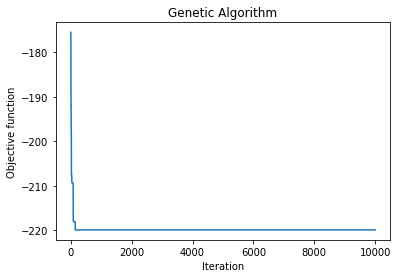

In [27]:
# Run GA Model
model.run()

In [24]:
# Print Report
convergence = model.report
np.savetxt("convergence.csv", convergence, delimiter=",")
# print(convergence)

In [25]:
# Print Best Solutions
solution = model.output_dict
print(solution)

{'variable': array([1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.]), 'function': -219.88991320472232}
